In [5]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from numpy.linalg import svd
from sklearn.decomposition import PCA
import seaborn as sns
#dataset
dataset = pd.read_csv('heart.csv')

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


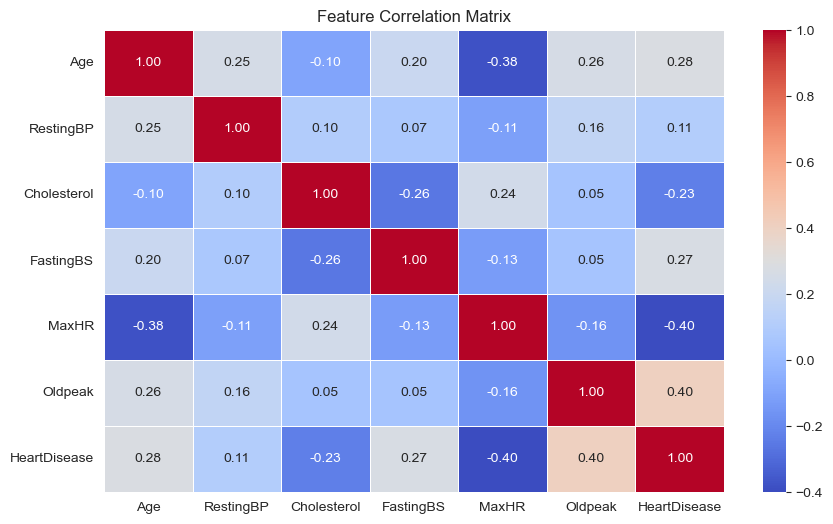

In [6]:
#a) Use Python to calculate and display the correlation matrix, and identify potential features relevant for classification.

# drop non-numeric columns
numeric_data = dataset.select_dtypes(include=['number'])
#(since correlation only works with numbers)

correlation_matrix = numeric_data.corr() #calculate
# display correlation matrix
print(correlation_matrix)

# visualize matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


#_______________reading the matrix__________________________
#
# 1 - find the row or column of the variable you care about.
# 2 - look at the values to see how it relates to others.
# 3 - higher absolute values (closer to 1 or -1) mean stronger relationships
#
#______________how to interpret this specific matrix_________________
#Heart disease has negative correlation to the MaxHR ; (-0.400421) "Higher max heart rate is linked to a lower risk of heart disease"
#Heart disease has a positive correlation to oldPeak ; ( 0.403951) "Higher old peak is linked to a higher risk of heart disease "
#There is a weak positive correlation between Age and Heart disease

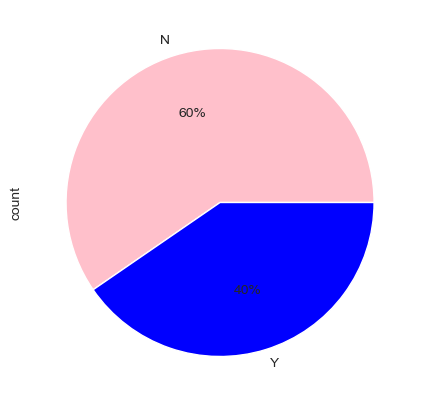

'The results as shown 60% chose no (N) and 40% chose yes (Y) which means that the people who experience\nexercise angina are less than 50% but I assume that those 40% would be at a higher risk of a heart/cardiac conditions.'

In [7]:
#B) Use Python to find the class distribution of a selected categorical feature and analyze the results
df = pd.read_csv("heart.csv")
cate_feature = 'ExerciseAngina'
class_distribution = df[cate_feature].value_counts() #counting the occurrences
class_distribution.plot(kind = 'pie', subplots = True, figsize = (5,5), autopct='%1.0f%%', colors = ['Pink', 'Blue'])#creating the chart
plt.show()
"""The results as shown 60% chose no (N) and 40% chose yes (Y) which means that the people who experience
exercise angina are less than 50% but I assume that those 40% would be at a higher risk of a heart/cardiac conditions."""

In [8]:
#c) Apply Python techniques to create new features from existing ones (feature engineering) and explain the significance of the new features.
dataset["Cholesterol_BP_Ratio"] = dataset["Cholesterol"] / dataset["RestingBP"]
#This shows how much cholesterol is present relative to blood pressure, which is useful in analyzing cardiovascular risks.